In [2]:
# Importing libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import tree
import warnings

In [3]:
csv_file_path= r'D:\Crop Recommender\model\Crop_recommendation (1).csv'
df = pd.read_csv(csv_file_path)

In [4]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [5]:
df.tail()

N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

In [6]:
df.size

17600

In [7]:
df.shape

(2200, 8)

In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [11]:
df['label'].value_counts()

orange         100
pigeonpeas     100
grapes         100
apple          100
papaya         100
lentil         100
banana         100
mothbeans      100
mungbean       100
blackgram      100
coffee         100
rice           100
jute           100
watermelon     100
coconut        100
chickpea       100
mango          100
maize          100
cotton         100
muskmelon      100
pomegranate    100
kidneybeans    100
Name: label, dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
numeric_crop = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_crop.corr(),annot=True)

<AxesSubplot:>

In [14]:
#Separating features and target labels
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [15]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [16]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [17]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


ModuleNotFoundError: No module named 'xgboost'

In [18]:
# Evaluate Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(Xtrain, Ytrain)
Y_pred_lr = logistic_regression.predict(Xtest)
lr_accuracy = metrics.accuracy_score(Ytest, Y_pred_lr)

print("Logistic Regression accuracy:", metrics.accuracy_score(Ytest, Y_pred_lr))
print("Logistic Regression classification report:")
print(classification_report(Ytest, Y_pred_lr))

Logistic Regression accuracy: 0.9681818181818181
Logistic Regression classification report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.93      0.88      0.90        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.90      0.90      0.90        20
      grapes       1.00      1.00      1.00        18
        jute       0.85      1.00      0.92        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.92      0.96      0.94        23
       maize       0.90      0.90      0.90        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.89      0.89      0.89        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00

C:\Users\TUSHAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Evaluate Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(Xtrain, Ytrain)
Y_pred_nb = naive_bayes.predict(Xtest)
nb_accuracy = metrics.accuracy_score(Ytest, Y_pred_nb)

print("Naive Bayes accuracy:", metrics.accuracy_score(Ytest, Y_pred_nb))
print("Naive Bayes classification report:")
print(classification_report(Ytest, Y_pred_nb))


Naive Bayes accuracy: 0.990909090909091
Naive Bayes classification report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      

In [20]:
# Evaluate Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(Xtrain, Ytrain)
Y_pred_forest = random_forest.predict(Xtest)
rf_accuracy = metrics.accuracy_score(Ytest, Y_pred_forest)

print("Random Forest accuracy:", metrics.accuracy_score(Ytest, Y_pred_forest))
print("Random Forest classification report:")
print(classification_report(Ytest, Y_pred_forest))


Random Forest accuracy: 0.9931818181818182
Random Forest classification report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      0.96      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
 

In [21]:
# Evaluate Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(Xtrain, Ytrain)
Y_pred_tree = decision_tree.predict(Xtest)
dt_accuracy = metrics.accuracy_score(Ytest, Y_pred_tree)

print("Decision Tree accuracy:", metrics.accuracy_score(Ytest, Y_pred_tree))
print("Decision Tree classification report:")
print(classification_report(Ytest, Y_pred_tree))

Decision Tree accuracy: 0.9840909090909091
Decision Tree classification report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      0.94      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.95      0.91      0.93        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.90      0.95      0.92        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
 

In [22]:
# Evaluate SVM
svm = SVC()
svm.fit(Xtrain, Ytrain)
Y_pred_svm = svm.predict(Xtest)
svm_accuracy = metrics.accuracy_score(Ytest, Y_pred_svm)

print("SVM accuracy:", metrics.accuracy_score(Ytest, Y_pred_svm))
print("SVM classification report:")
print(classification_report(Ytest, Y_pred_svm))

SVM accuracy: 0.9772727272727273
SVM classification report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.85      1.00      0.92        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.92      1.00      0.96        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.

In [23]:
from sklearn.preprocessing import LabelEncoder

xgb = XGBClassifier()

# Encoding the target labels
label_encoder = LabelEncoder()
Ytrain_encoded = label_encoder.fit_transform(Ytrain)
Ytest_encoded = label_encoder.transform(Ytest)

# Using the encoded target labels to fit the XGBoost classifier
xgb.fit(Xtrain, Ytrain_encoded)
Y_pred_xgb = xgb.predict(Xtest)

# Convert the predicted labels back to their original form for evaluation
Y_pred_xgb_original = label_encoder.inverse_transform(Y_pred_xgb)

# Evaluate the XGBoost classifier
print("XGBoost accuracy:", accuracy_score(Ytest, Y_pred_xgb_original))
print("XGBoost classification report:")
print(classification_report(Ytest, Y_pred_xgb_original))
xgb_accuracy = metrics.accuracy_score(Ytest, Y_pred_xgb_original)

# Perform cross-validation for the XGBoost classifier
xgb_cv_scores = cross_val_score(xgb, Xtrain, Ytrain_encoded, cv=5)
print("Cross-validation scores for XGBoost:", xgb_cv_scores)


NameError: name 'XGBClassifier' is not defined

In [24]:

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, features, target, cv=5)
    print(f"Cross-validation scores for {model_name}:", cv_scores)

print("Cross-validation scores for XGBoost:", xgb_cv_scores)

C:\Users\TUSHAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TUSHAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Cross-validation scores for Logistic Regression: [0.95       0.96590909 0.94772727 0.96590909 0.94318182]
Cross-validation scores for SVM: [0.98409091 0.97954545 0.97954545 0.97272727 0.975     ]
Cross-validation scores for Naive Bayes: [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]
Cross-validation scores for Random Forest: [0.99772727 0.99318182 0.99772727 0.99545455 0.98863636]
Cross-validation scores for DecisionTreeClassifier: [0.99090909 0.98409091 0.99318182 0.99318182 0.98181818]


NameError: name 'xgb_cv_scores' is not defined

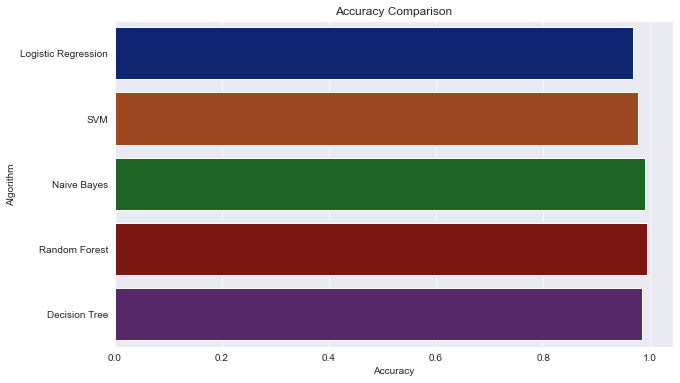

In [29]:
# Data
classifiers = ['Logistic Regression', 'SVM', 'Naive Bayes',  'Random Forest', 'Decision Tree']
accuracies = [lr_accuracy, svm_accuracy, nb_accuracy,  rf_accuracy, dt_accuracy]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x=accuracies, y=classifiers, palette='dark')
plt.show()


In [30]:
for name, accuracy in zip(classifiers, accuracies):
    print(f"{name} ---> {accuracy}")


Logistic Regression ---> 0.9681818181818181
SVM ---> 0.9772727272727273
Naive Bayes ---> 0.990909090909091
Random Forest ---> 0.9931818181818182
Decision Tree ---> 0.9840909090909091


In [31]:
import pickle
# Dump the trained Random Forest classifier with Pickle
RF_pkl_filename = '../RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(random_forest, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [32]:
#Making Prediction

data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = random_forest.predict(data)
print(prediction)

['coffee']


In [33]:
data = np.array([[63,35,16, 22.02721, 65.35, 6.2, 83.73]])
prediction = random_forest.predict(data)
print(prediction)

['maize']


In [34]:
data = np.array([[85,58,41,21.77046169,80.31964408,7.038096361,226.6555374]])
prediction = random_forest.predict(data)
print(prediction)

['rice']
